In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
#import os

#import string

%matplotlib inline

In [64]:
# Read in the saved files
directory = 'Binned_results/'

files = glob.glob('Binned_results/*.csv')
all_frames_lst = []

for file in files:
    frame = pd.read_csv(file)
    all_frames_lst.append(frame)
    
master = pd.concat(all_frames_lst)

# Determine genotype
animal_lst = master.Animal
gen_lst = []

def get_genotype(animal):
    '''Infer the genotype from name of animal'''
    if '2CW' in animal:
        return 'mut'
    elif 'Z1' in animal:
        return 'Other'
    else:
        return 'WT'

master['Genotype'] = master.Animal.apply(get_genotype)

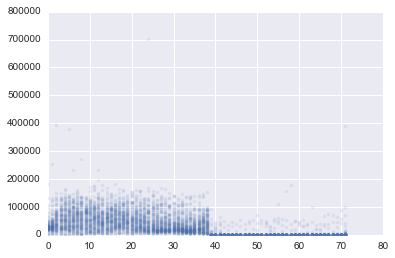

In [66]:
plt.plot(master.Period, master.Activity, '.', alpha=0.1)

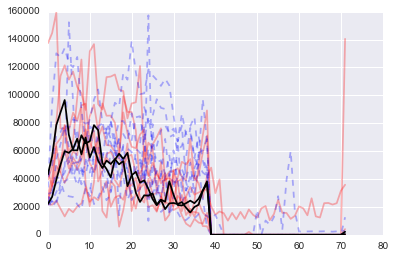

In [73]:
# Get average activity for each animal
mean_fr = master.groupby(['Animal','Period']).mean()['Activity']
mean_fr = mean_fr.reset_index()



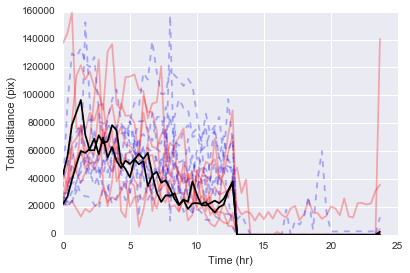

In [76]:
# Plot
for animal in mean_fr.Animal.unique():
    animal_fr = mean_fr[mean_fr.Animal == animal]
    if '2CW' in animal: # mutant
        plt.plot(animal_fr.Period/3, animal_fr.Activity, alpha=0.3, color='red')
    elif 'Z1' in animal: # other
        plt.plot(animal_fr.Period/3, animal_fr.Activity, alpha=1, color='black')
    else:
        plt.plot(animal_fr.Period/3, animal_fr.Activity, '--', alpha=0.3, color='blue')
        
plt.xlabel('Time (hr)')
plt.ylabel('Total distance (pix)')
        

In [82]:
# Get 'average line' for wt, mutant, other
mean_fr['Genotype'] = mean_fr.Animal.apply(get_genotype)

wt_animals_mean = mean_fr[mean_fr.Genotype == 'WT']
mut_animals_mean = mean_fr[mean_fr.Genotype == 'mut']
other_animals_mean = mean_fr[mean_fr.Genotype == 'Other']

wt_mean_activity = wt_animals_mean.groupby('Period').mean()
mut_mean_activity = mut_animals_mean.groupby('Period').mean()
other_mean_activity = other_animals_mean.groupby('Period').mean()


In [85]:
genotype_mean_fr = mean_fr.groupby(['Genotype', 'Period']).mean()
genotype_mean_fr = genotype_mean_fr.reset_index()

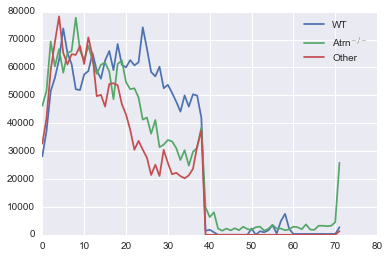

In [92]:
# Plot mean lines
for gtype in ['WT', 'mut', 'Other']:
    fr = genotype_mean_fr[genotype_mean_fr.Genotype == gtype]
    plt.plot(fr.Period, fr.Activity)
    
plt.legend(('WT', 'Atrn$^{-/-}$', 'Other'))

In [56]:
mean_fr.unstack()

Period,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Animal,,,,,,,,,,,,,,,,,,,,,
2CW100,39523.029319,48942.275370,80910.495121,113830.651220,121505.425716,111250.167806,117027.504390,106034.641601,101374.408981,89507.260263,...,0.000000,0.000000,0.000000,0.000000,0.006700,0.000000,0.000000,0.000000,0.000000,4083.315658
2CW305,21897.053964,21585.957338,24382.282117,18669.679602,13156.740387,18580.399071,16194.127236,20285.047695,22454.367607,34236.770246,...,0.000000,0.000000,0.000000,0.000667,0.000000,0.000000,0.000000,0.000667,0.000000,131.062672
2CW306,25871.025934,35647.218941,42395.248105,54661.680077,61085.084448,47515.728366,55273.999565,50577.302553,57527.734448,75636.329023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.340615
2CW308,28797.884169,40977.168433,63364.585524,44945.069549,78834.288682,58557.388161,67375.183844,98521.816380,125655.596209,66221.221770,...,0.000000,0.000000,0.000000,0.000000,0.000667,0.000000,0.000000,0.000000,0.000000,0.000000
2CW312,45836.559746,34754.282628,49366.165377,44611.726644,37237.884382,44518.553038,52473.708841,46572.674437,53746.241563,65860.193760,...,13986.946103,26157.986010,13207.185489,12399.622967,22648.790131,22822.832986,21669.686130,22640.114696,31551.432265,35877.304782
2CW317,24243.763639,34615.979005,65219.632858,69211.978256,78092.472193,74714.903721,87559.615997,81919.317254,92826.886203,93976.314629,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000400,0.000000,0.000000,0.000000,168.774836
2CW318,137361.640300,144609.940487,159403.632356,76242.819956,76129.186490,51608.070210,59931.828120,57152.308881,91093.451227,36624.395712,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140435.215929
LB06,21196.073158,24052.873880,54495.784627,64877.429804,77330.712218,63129.299749,45036.476906,35292.699096,44064.612128,50765.390061,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.694956
LB11,29481.110118,30190.619928,37090.683582,38122.557107,29078.736750,27609.022891,27094.578363,21767.386024,18205.634172,33194.881919,...,0.000250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,625.879373
